# Task 5: Introduction to Computer Vision with OpenCV

## Section 1: Setup & Dataset

### **Task 1**: Load and Display an Image
*Instruction*: Using OpenCV, read an image (`sample.jpg`) and display it using both OpenCV and Matplotlib.

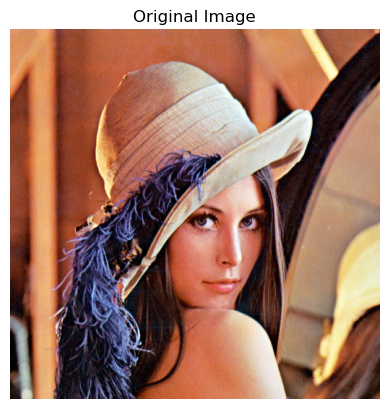

In [2]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('sample.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Display using matplotlib
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Original Image')
plt.show()

## Section 2: Image Properties and Resizing

### **Task 2**: Print Image Properties and Resize

*Instruction*: Print the shape (height, width, channels) of the image. Resize it to 100x100 pixels.


Original Shape: (512, 512, 3)


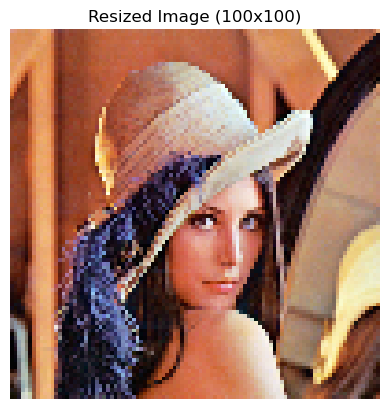

In [3]:
print(f"Original Shape: {image.shape}")
resized = cv2.resize(image, (100, 100))
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title("Resized Image (100x100)")
plt.axis('off')
plt.show()

## Section 3: Cropping and Rotation

### **Task 3**: Crop and Rotate the Image

*Instruction*: Use Keras to create a simple feedforward neural network with:


*   Crop the center square of the image
*   Rotate the image by 45 degrees using `cv2.getRotationMatrix2D`


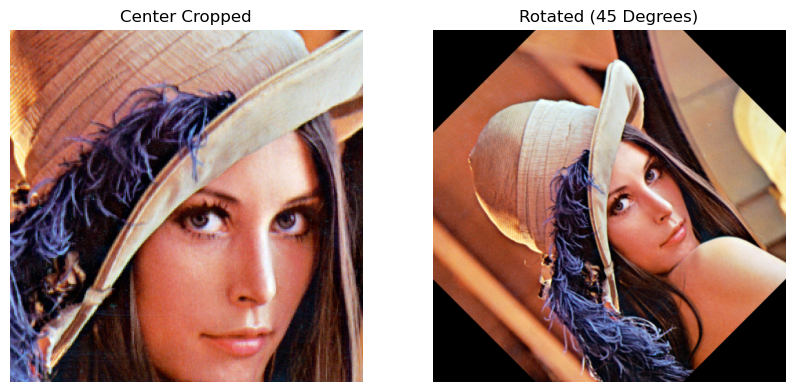

C:\Users\lenovo\Miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,249 (83.00 KB)

 Trainable params: 21,249 (83.00 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Cropping
(h, w) = image.shape[:2]
center_crop = image[h//4:h*3//4, w//4:w*3//4]

# Rotation
M = cv2.getRotationMatrix2D((w//2, h//2), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))

# Display
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(center_crop, cv2.COLOR_BGR2RGB))
plt.title('Center Cropped')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title('Rotated (45 Degrees)')
plt.axis('off')

plt.show()

#Use Keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a simple feedforward neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(100,)),  # 100 input features
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (example)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()


## Section 4: Drawing & Annotation

### **Task 4**: Draw Shapes and Text on an Image

*Instruction*: Draw a rectangle, circle, line, and add text on the image.

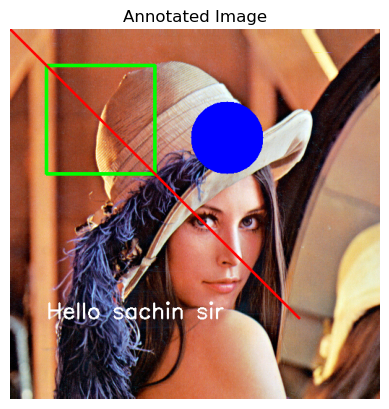

In [9]:
annotated = image.copy()
cv2.rectangle(annotated, (50, 50), (200, 200), (0, 255, 0), 3)
cv2.circle(annotated, (300, 150), 50, (255, 0, 0), -1)
cv2.line(annotated, (0, 0), (400, 400), (0, 0, 255), 2)
cv2.putText(annotated, "Hello sachin sir", (50, 400), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.title("Annotated Image")
plt.axis('off')
plt.show()

## Section 5: Filters and Edge Detection

### **Task 5**:  Apply Blur and Canny Edge Detection

*Instruction*: Apply Gaussian blur and detect edges using the Canny algorithm.


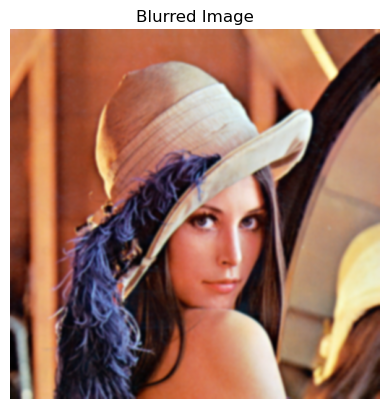

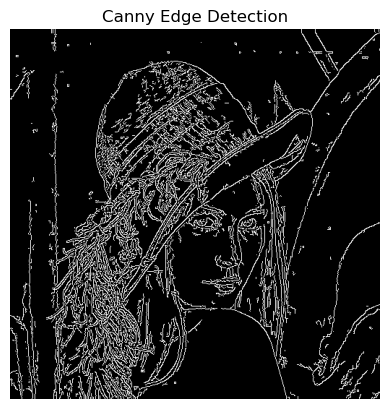

In [10]:
blurred = cv2.GaussianBlur(image, (7, 7), 0)
edges = cv2.Canny(image, 100, 200)

# Display
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title("Blurred Image")
plt.axis('off')
plt.show()

# Display edges
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()

## Section 6: Color Spaces and Histogram

### **Task 6**: Convert Color Spaces and Plot Histogram

*Instruction*: Convert the image to grayscale and HSV. Then plot a histogram of grayscale values.

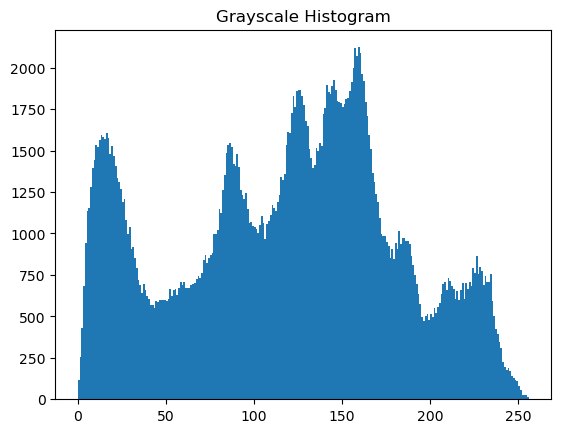

In [11]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

plt.hist(gray.ravel(), bins=256, range=[0,256])
plt.title("Grayscale Histogram")
plt.show()